# THE SPARKS FOUNDATION
# DATA SCIENCE AND BUSINESS ANALYTICS INTERN
# TASK-3 EXPLORATORY DATA ANALYSIS-RETAIL
# AUTHOR-GAYATHRY DEVI LOGESWARAN

In [1]:
# Well, first things first. We will load the Superstore dataset into python to perform EDA.
#Load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#Load the data
df = pd.read_csv("C:/Users/39375/Desktop/Gayu/VIRTUAL INTERNSHIP/Spark foundation/SampleSuperstore.csv")


#View the data
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


#  Basic information about data - EDA

The df.info() function will give us the basic information about the dataset. For any data, it is good to start by knowing its information. Let’s see how it works with our data.

In [2]:
#Basic information

df.info()

#Describe the data

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Using this function, you can see the number of null values, datatypes, and memory usage as shown in the above outputs along with descriptive statistics.

# Duplicate values

You can use the df.duplicate.sum() function to the sum of duplicate value present if any. It will show the number of duplicate values if they are present in the data.

In [3]:
#Find the duplicates

df.duplicated().sum()

17

The output is greater than 0, it means there are duplicate rows in the DataFrame.

In [4]:
# Remove duplicates from DataFrame
df.drop_duplicates(inplace=True)


This will remove all duplicate rows from the DataFrame df and modify it in place (i.e., the changes will be saved to the original DataFrame).

In [5]:
#Recheck the duplicates

df.duplicated().sum()

0

Well, the function returned ‘0’. This means, there is not a single duplicate value present in our dataset and it is a very good thing to know.

#  Unique values in the data

You can find the number of unique values in the particular column using unique() function in python.

In [6]:
#unique values

df['Ship Mode'].unique()

df['Segment'].unique()

df['Country'].unique()

df['Region'].unique()

df['Category'].unique()

df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

The unique() function has returned the unique values which are present in the data and it is pretty much cool!

# Find the Null values

Finding the null values is the most important step in the EDA. As I told many a time, ensuring the quality of data is paramount. So, let’s see how we can find the null values

In [7]:
#Find null values

df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Whoo! That’s awesome.There is no null values

# Know the datatypes

Knowing the datatypes which you are exploring is very important and an easy process too. Let’s see how it works.

In [8]:
#Datatypes

df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

That’s it. You have to use the dtypes function for this a shown and you will get the datatypes of each attribute.

# Drop the unwanted columns
Here, in the country column all the country refers to United States. So, we drop that .

In [9]:
df.drop('Country',axis=1,inplace=True)
df.drop('Postal Code',axis=1,inplace=True)

In [10]:
#To check once again the columns
df.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

#  Visualize the Unique counts

Yes, you can visualize the unique values present in the data. For this, we will be using the seaborn library. You have to call the sns.countlot() function and specify the variable to plot the count plot.

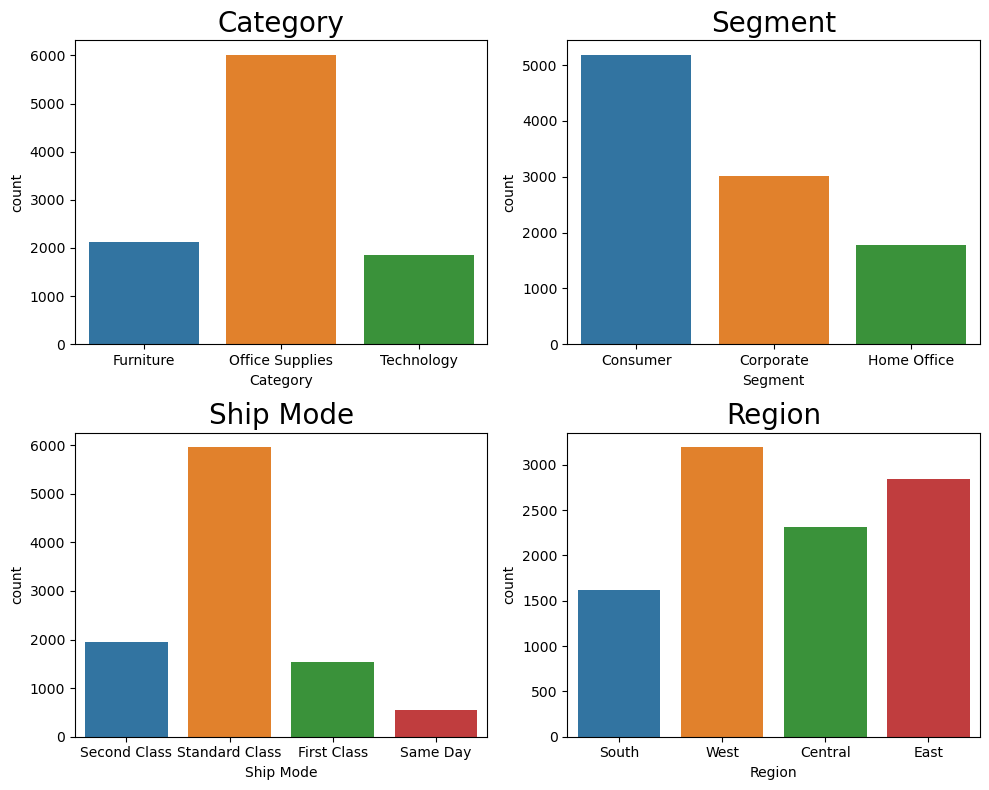

In [11]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(10,8));

sns.countplot(df['Category'],ax=axs[0][0])
sns.countplot(df['Segment'],ax=axs[0][1])
sns.countplot(df['Ship Mode'],ax=axs[1][0])
sns.countplot(df['Region'],ax=axs[1][1])
axs[0][0].set_title('Category',fontsize=20)
axs[0][1].set_title('Segment',fontsize=20)
axs[1][0].set_title('Ship Mode',fontsize=20)
axs[1][1].set_title('Region',fontsize=20)

plt.tight_layout()

That’s great! You are doing good. It is as simple as that. Though EDA has two approaches, a blend of graphical and non-graphical will give you the bigger picture altogether.

#  Correlation Plot - EDA

Finally, to find the correlation among the variables, we can make use of the correlation function. This will give you a fair idea of the correlation strength between different variables.

In [12]:
#Correlation 

df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


This is the correlation matrix with the range from +1 to -1 where +1 is highly and positively correlated and -1 will be highly negatively correlated.

You can even visualize the correlation matrix using seaborn library as shown below.

<AxesSubplot:>

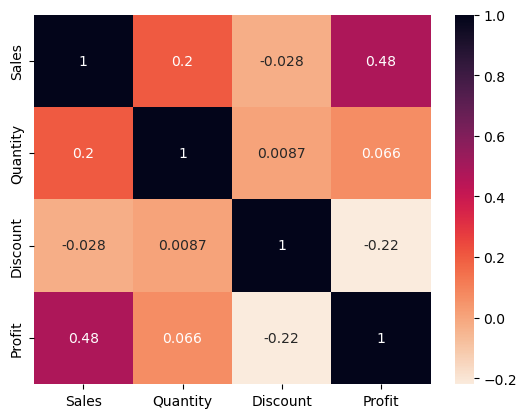

In [13]:
#Correlation plot

sns.heatmap(df.corr(),cmap='rocket_r',annot=True)

From above heatmap :

Sales and profit are moderately correlated.
Discount and Profit are negatively correlated.
Quantity and Profit are less moderately correlated

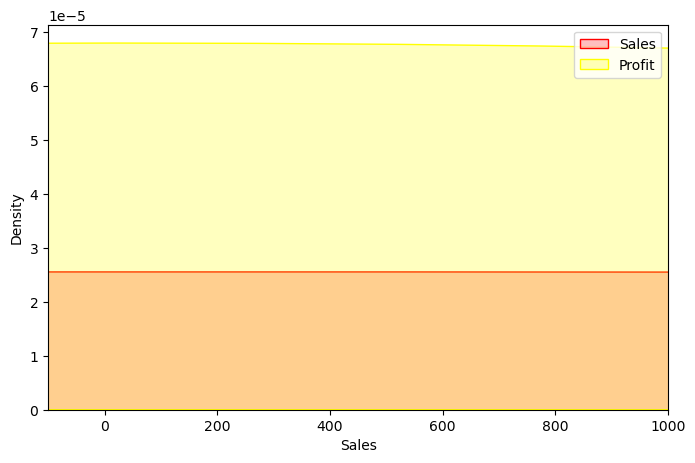

In [14]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['Sales'],color='red',label='Sales',shade=True,bw=25)
sns.kdeplot(df['Profit'],color='yellow',label='Profit',shade=True,bw=25)
plt.xlim([-100,1000])
plt.legend()


Profit is more than that of sale but there are some areas where profit could be increased.

# Analysis using Pairplot of each column
## 1. Based on Category

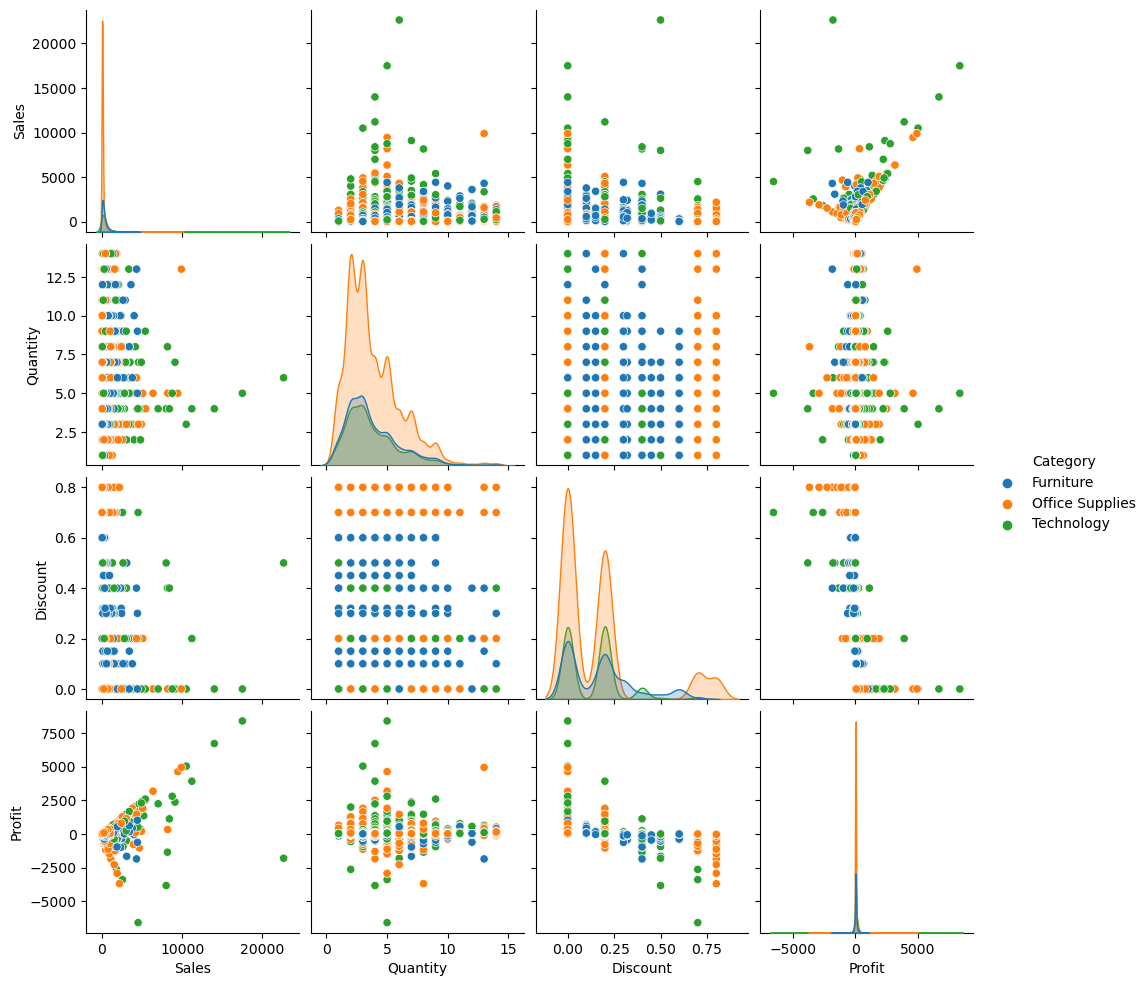

In [15]:
sns.pairplot(df,hue='Category')

## 2. Based on Ship Mode

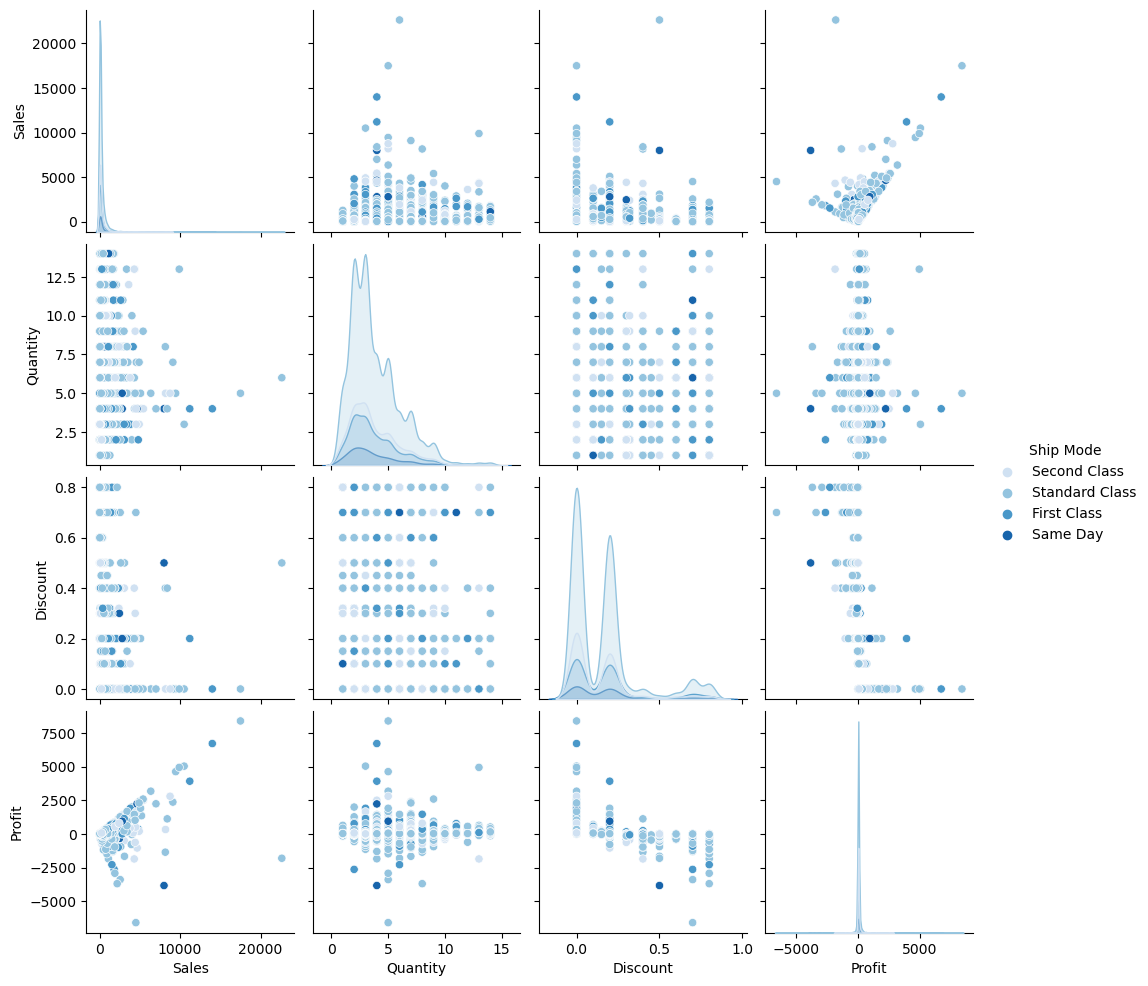

In [16]:
sns.pairplot(df,hue='Ship Mode',palette='Blues')

## 3. Based on Region

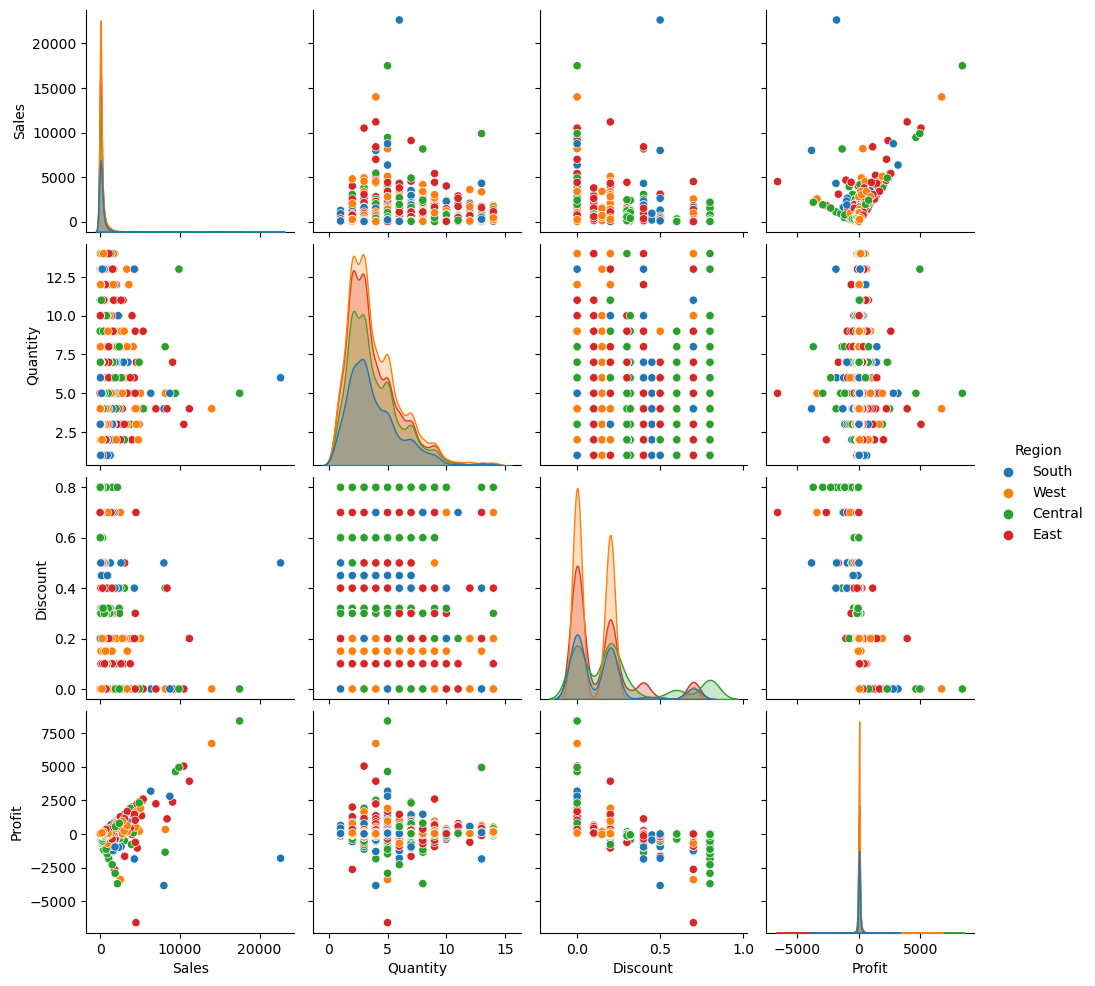

In [17]:
sns.pairplot(df,hue='Region')

# Distribution of the data

<function matplotlib.pyplot.show(close=None, block=None)>

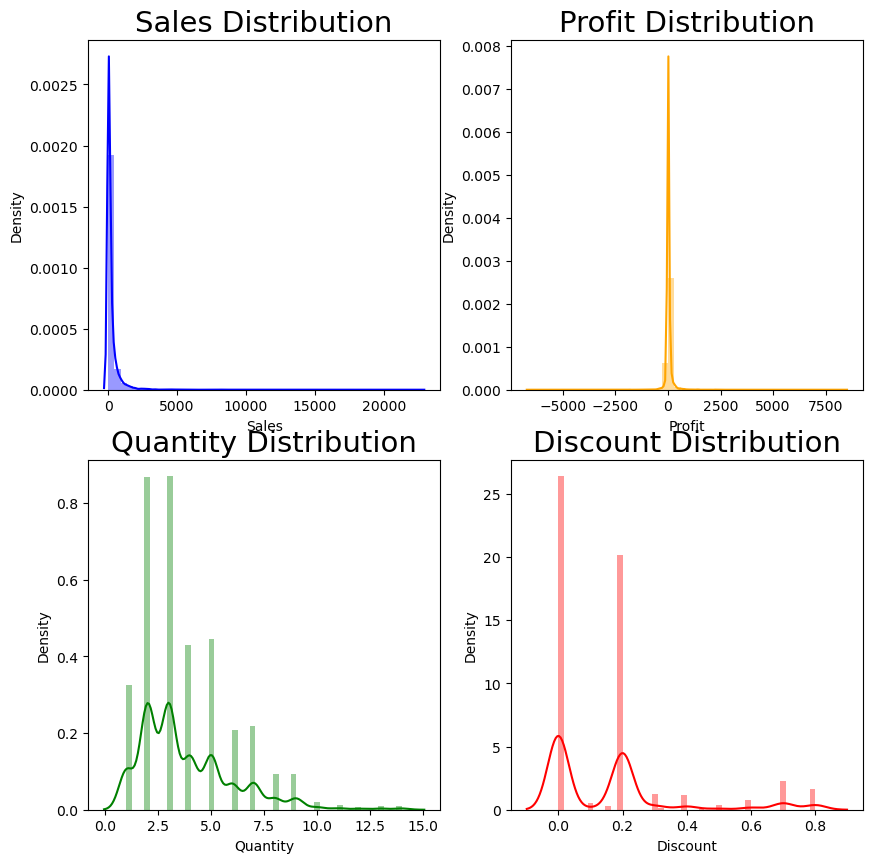

In [18]:
#set figure size and create subplots
fig , axs = plt.subplots(ncols=2,nrows=2,figsize=(10,10))
#Create distribution plots for each variable
sns.distplot(df['Sales'],color='blue',ax= axs[0][0])
sns.distplot(df['Profit'],color='orange',ax=axs[0][1])
sns.distplot(df['Quantity'],color='green',ax=axs[1][0])
sns.distplot(df['Discount'],color='red',ax=axs[1][1])
#Set titles for each subplot
axs[0][0].set_title('Sales Distribution',fontsize=21)
axs[0][1].set_title('Profit Distribution',fontsize=21)
axs[1][0].set_title('Quantity Distribution',fontsize=21)
axs[1][1].set_title('Discount Distribution',fontsize=21)
#Show the plot
plt.show

# Segment wise analysis on Profit, Discount, Sales, Quantity

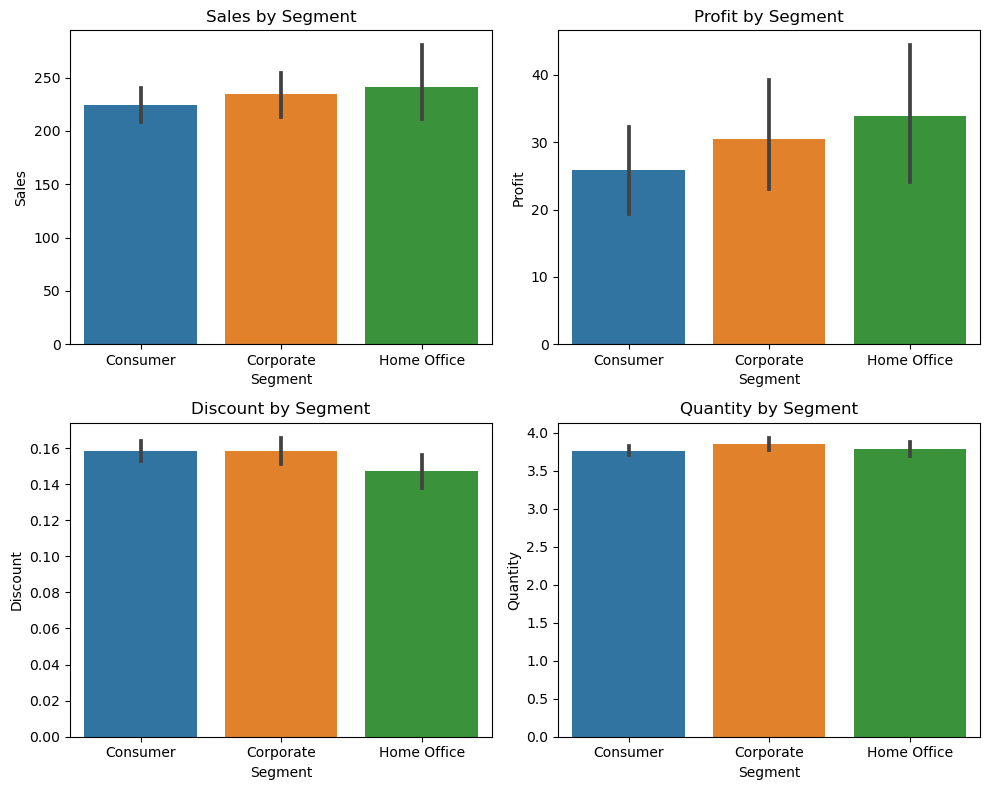

In [19]:
# Group data by segment
segment_groups = df.groupby('Segment')

# Calculate mean profit, discount, sales, and quantity for each segment
profit_mean = segment_groups['Profit'].mean()
discount_mean = segment_groups['Discount'].mean()
sales_mean = segment_groups['Sales'].mean()
quantity_mean = segment_groups['Quantity'].mean()

# Plot the results
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

sns.barplot(x='Segment', y='Sales', data=df, ax=axs[0][0])
sns.barplot(x='Segment', y='Profit', data=df, ax=axs[0][1])
sns.barplot(x='Segment', y='Discount', data=df, ax=axs[1][0])
sns.barplot(x='Segment', y='Quantity', data=df, ax=axs[1][1])

axs[0][0].set_title('Sales by Segment')
axs[0][1].set_title('Profit by Segment')
axs[1][0].set_title('Discount by Segment')
axs[1][1].set_title('Quantity by Segment')

plt.tight_layout()
plt.show()


    The highest sales are generated by the Home Office segment, accounting for above 230 of the total sales, followed by Corporate segment and Consumer segment.
    The Home Office segment receives the highest profit margin at 37, followed by the Corporate segment at 33, and the Consumer segment at 28.
    The Home Office segment also receives the lowest average discount at 0.14, followed by both the Consumer and Corporate segments at 0.15.



# State-wise Analysis

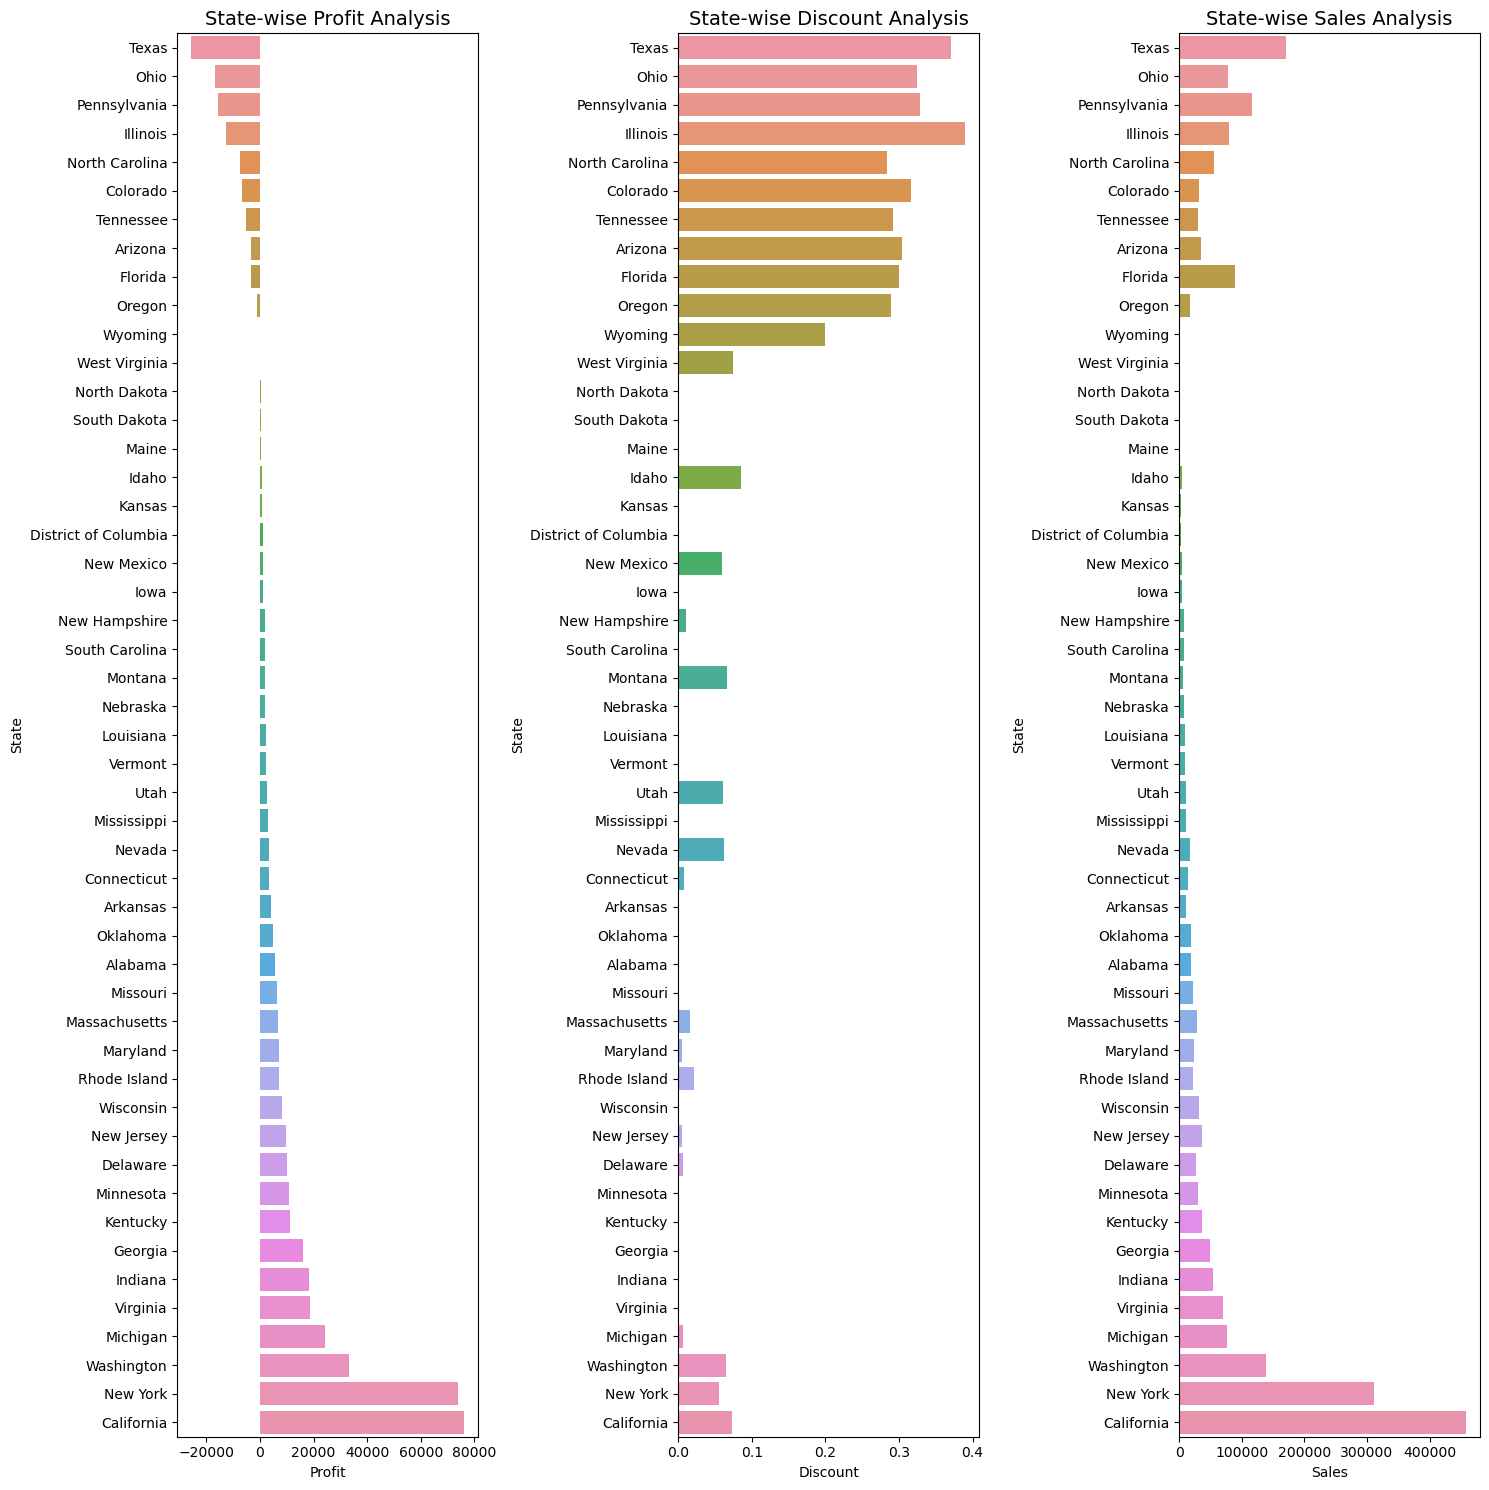

In [20]:
# Group data by state
state_data = df.groupby(['State']).agg({'Profit': 'sum', 'Discount': 'mean', 'Sales': 'sum'}).reset_index()

# Sort data by profit in descending order
state_data = state_data.sort_values('Profit')

# Plot state-wise analysis of profit, discount, and sales
fig, axs = plt.subplots(ncols=3, figsize=(15,15))
sns.barplot(x='Profit', y='State', data=state_data, ax=axs[0])
sns.barplot(x='Discount', y='State', data=state_data, ax=axs[1])
sns.barplot(x='Sales', y='State', data=state_data, ax=axs[2])
axs[0].set_title('State-wise Profit Analysis', fontsize=14)
axs[1].set_title('State-wise Discount Analysis', fontsize=14)
axs[2].set_title('State-wise Sales Analysis', fontsize=14)
plt.tight_layout()
plt.show()


CALIFORNIA shows highest profit and TEXAS shows lowest.
Likewise CALIFORNIA shows highest sales and WYOMING shows the lowest.
According to discount ILLINOIS shows the highest.

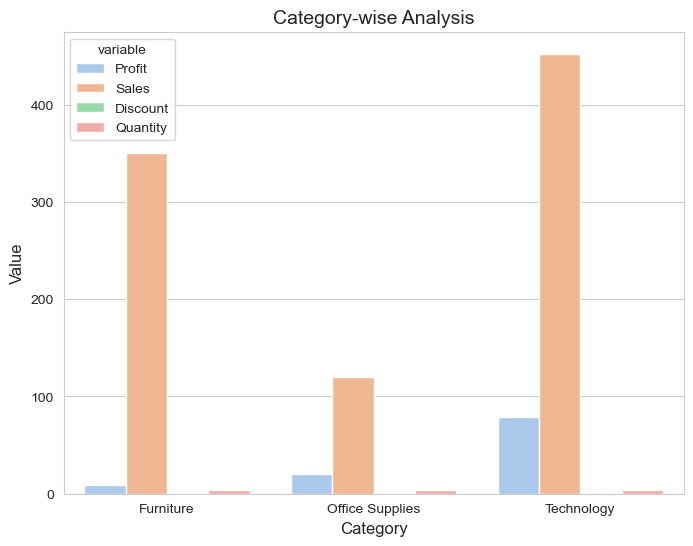

In [21]:
sns.set_style('whitegrid')

category_data = df.groupby('Category')[['Profit', 'Sales', 'Discount','Quantity']].mean().reset_index()

fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(x='Category', y='value', hue='variable', 
            data=pd.melt(category_data, id_vars=['Category']), 
            palette='pastel', ax=ax)

ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('Value', fontsize=12)
ax.set_title('Category-wise Analysis', fontsize=14)

plt.show()


Maximum sales and profit is obtained in TECHNOLOGY.
Minimum profit obtained in FURNITURE.

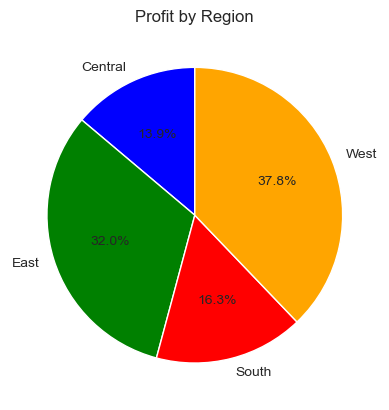

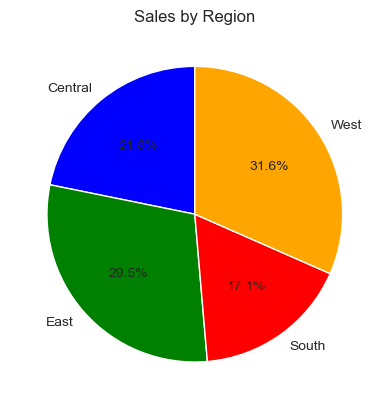

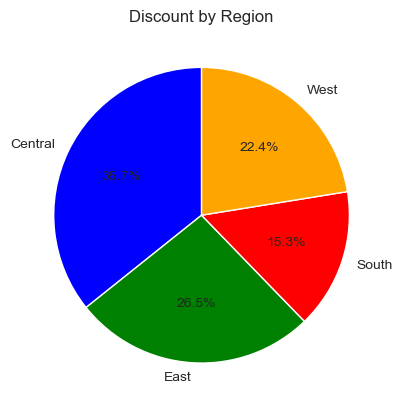

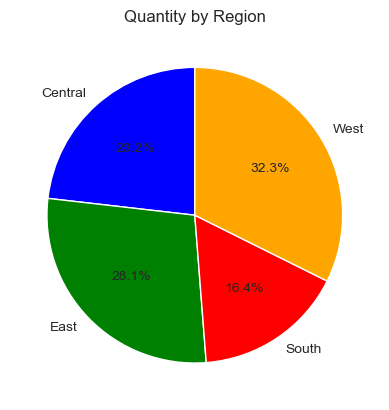

In [22]:
# Create a pivot table with region as rows and columns for profit, sales, discount, and quantity
pivot = pd.pivot_table(df, index='Region', values=['Profit', 'Sales', 'Discount', 'Quantity'], aggfunc='sum')

# Plot a pie chart for each column
columns = ['Profit', 'Sales', 'Discount', 'Quantity']
colors = ['blue', 'green', 'red', 'orange']

for i, col in enumerate(columns):
    plt.figure(i)
    plt.pie(pivot[col], labels=pivot.index, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title(f'{col} by Region')

plt.show()


Acoording to Profit WEST is highest with 37.8% and Central is lowest with 13.9%.
According to Sales WEST is highest with 31.6% and SOUTH is lowest with 17.1%.
According to Discount CENTRAL is highest with 35.7% and South is lowest with 15.3%.
According to Quantity WEST region is highest with 32.3% and SOUTH is lowest with 16.4%.

In [23]:
# Create a pivot table with sub-category as rows and columns for profit, sales, discount, and quantity
pivot = pd.pivot_table(df, index='Sub-Category', values=['Profit', 'Sales', 'Discount', 'Quantity'], aggfunc='sum')

# Sort the pivot table by profit in descending order
pivot = pivot.sort_values(by='Profit', ascending=False)

# Print the pivot table
print(pivot)


              Discount      Profit  Quantity        Sales
Sub-Category                                             
Copiers          11.00  55617.8249       234  149528.0300
Phones          137.40  44515.7306      3289  330007.0540
Accessories      60.80  41936.6357      2976  167380.3180
Paper           101.80  33944.2395      5144   78224.1420
Binders         566.20  30228.0003      5971  203409.1690
Chairs          104.70  26567.1278      2351  327777.7610
Storage          63.20  21278.8264      3158  223843.6080
Appliances       77.60  18138.0054      1729  107532.1610
Furnishings     132.40  13052.7230      3560   91683.0240
Envelopes        20.40   6964.1767       906   16476.4020
Art              59.60   6524.6118      2996   27107.0320
Labels           25.00   5526.3820      1396   12444.9120
Machines         35.20   3384.7569       440  189238.6310
Fasteners        17.80    949.5182       914    3024.2800
Supplies         14.60  -1189.0995       647   46673.5380
Bookcases     

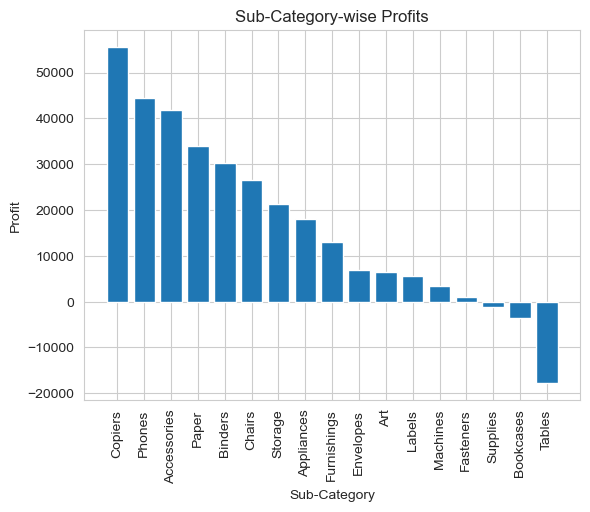

In [24]:
# Create a bar chart
plt.bar(pivot.index, pivot['Profit'])
plt.xticks(rotation=90)
plt.title('Sub-Category-wise Profits')
plt.xlabel('Sub-Category')
plt.ylabel('Profit')
plt.show()

Based on sub-category wise profit COPIERS are the highest with 55671 and TABLES are the least -17725.4811 

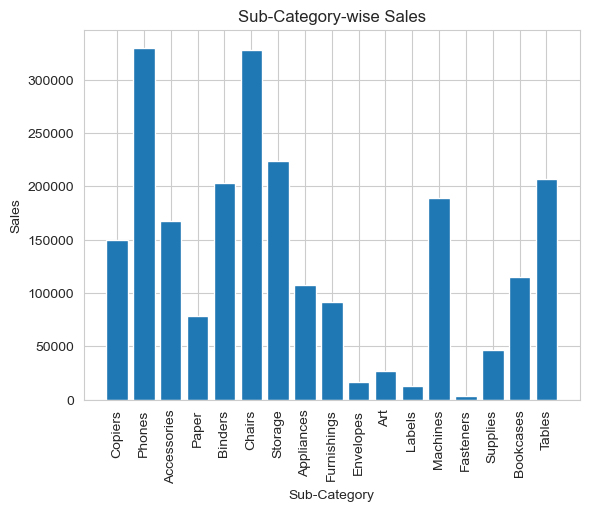

In [25]:
# Create a bar chart
plt.bar(pivot.index, pivot['Sales'])
plt.xticks(rotation=90)
plt.title('Sub-Category-wise Sales')
plt.xlabel('Sub-Category')
plt.ylabel('Sales')

plt.show()

Based on sub-category wise sales analysis, where PHONES has the highest sale and FASTNERS has the lowest sale.

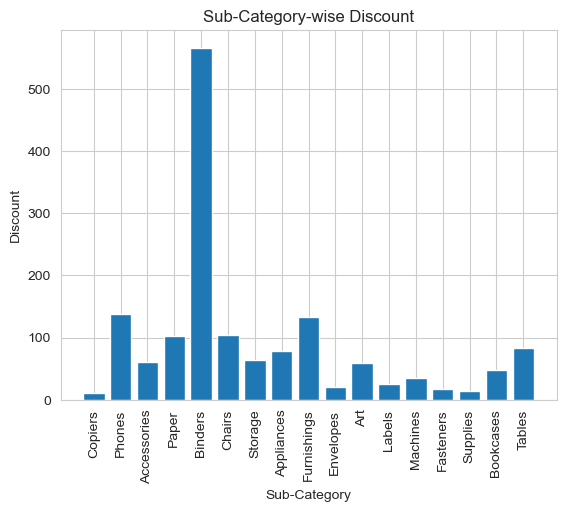

In [26]:
# Create a bar chart
plt.bar(pivot.index, pivot['Discount'])
plt.xticks(rotation=90)
plt.title('Sub-Category-wise Discount')
plt.xlabel('Sub-Category')
plt.ylabel('Discount')

plt.show()

Based on sub- category wise discount analysis BLINDERS are the highest.

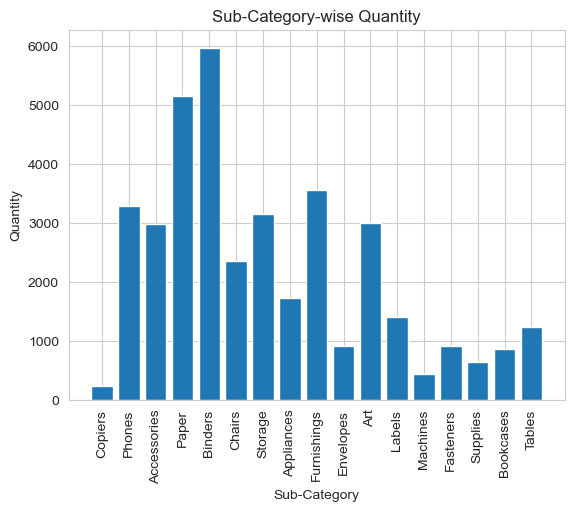

In [27]:
# Create a bar chart
plt.bar(pivot.index, pivot['Quantity'])
plt.xticks(rotation=90)
plt.title('Sub-Category-wise Quantity')
plt.xlabel('Sub-Category')
plt.ylabel('Quantity')

plt.show()

Based on sub-category quantity analysis BINDERS are the highset with 5971  and COPIERS are the lowest with 234. 

# Data- driven Insights


1.The moderate correlation between sales and profit indicates that as sales increase, there is a tendency for profit to increase as well. However, this relationship may not be linear and can vary based on factors such as industry, competition, and pricing strategies.

The negative correlation between discount and profit suggests that as discounts increase, there is a tendency for profit to decrease. This highlights the importance of carefully managing discounting strategies to balance short-term sales goals with long-term profitability.

2.The business is making a profit, which is a positive sign.Even though profit is higher than sales, it is important to ensure that the business is generating enough revenue to cover its expenses and remain sustainable in the long run.
Profit margins vary by industry and business model, so it is important to benchmark against competitors and industry standards to identify areas for improvement.

3.Based on the distribution analysis, the insights are     
Profit: Range and variability of profit margins reveal areas for improvement.
Sales: Range and variability of revenue generated highlight top-performing products or categories.
Discount: Distribution of discounts informs impact on sales and profit magins.
Quantity: Range and variability of product volume sold identify high-demand products.

4.Home Office segment is the top-performing segment in terms of both sales and profit margin.
Corporate and Consumer segments also contribute significantly to the total sales.
The Home Office segment enjoys the highest profit margin among all segments, indicating better pricing strategies or cost control.
All segments have a relatively low average discount, suggesting a potential opportunity for implementing targeted discount strategies to increase sales. The Home Office segment has the lowest average discount, indicating a higher willingness of customers to pay for the products.

5.California is the top-performing state in terms of both sales and profit margin.
Texas is the worst-performing state in terms of profit margin and sales.
Wyoming is the worst-performing state in terms of sales but its profit margin is not provided.
Illinois has the highest average discount, which may indicate the need to adjust pricing strategies or offer targeted promotions.
Understanding regional performance differences can help in identifying opportunities for growth and improving profitability.

6.The technology category generates the highest sales and profits among all categories. 
The furniture category generates the lowest profit margin among all categories.
There may be opportunities to optimize the pricing or product mix of the furniture category to increase profitability.
Focusing on the technology category can help to maximize sales and profits.

7.The West region has the highest profit margin among all regions, while the Central region has the lowest profit margin. This suggests that there may be opportunities to optimize profitability in the Central region.
The West region has the highest sales among all regions, while the South region has the lowest sales. This could indicate potential market opportunities in the South region.
The Central region has the highest average discount among all regions, suggesting that there may be opportunities to optimize pricing strategies to increase profitability in this region.
The West region has the highest quantity sold among all regions, while the South region has the lowest quantity sold. This could indicate potential market opportunities for increasing sales in the South region.

8.The company should focus more on selling COPIERS as they generate the highest profit compared to other sub-categories.
PHONES are the highest selling sub-category, so the company should try to increase their sales even more.
The company is giving more discount on BLINDERS as compared to other sub-categories, which may affect the overall profit margin.
The company should look into increasing the quantity sold for the COPIERS sub-category as they have the lowest quantity sold compared to other sub-categories.







# Conclusion

Based on the analysis of the data, it can be concluded that there are several factors that influence the sales and profitability of the company. The Home Office segment generates the highest sales and profit margin, while the Consumer segment generates the lowest profit margin. Sales and profit are moderately correlated, and discount and profit are negatively correlated. The California region generates the highest profit and sales, while Texas and Wyoming have the lowest profit and sales, respectively. The Technology sub-category has the highest profit and sales, while Furniture has the lowest profit. Overall, it is important for the company to focus on improving profitability in regions and categories that are underperforming and to continue to optimize discount strategies to maximize profitability.